In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import array_to_img,img_to_array, load_img

from PIL import Image


In [2]:
BATCH_SIZE = 32
IMG_SIZE = (200, 200)
train_dir = "H:/datasets/plastic_codes/training"
test_dir = "H:/datasets/plastic_codes/test"


In [3]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(200,200),
	class_mode='categorical',
  batch_size=BATCH_SIZE
)

validation_generator = validation_datagen.flow_from_directory(
	test_dir,
	target_size=(200,200),
	class_mode='categorical',
  batch_size=BATCH_SIZE
)

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

Found 376 images belonging to 7 classes.
Found 232 images belonging to 7 classes.


(8, 200, 200, 3)


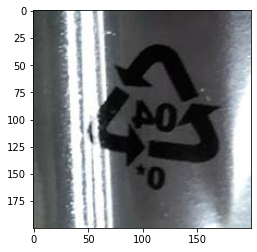

(8, 200, 200, 3)


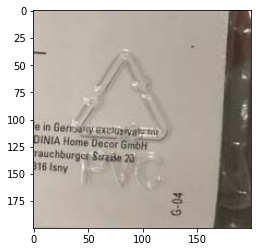

(8, 200, 200, 3)


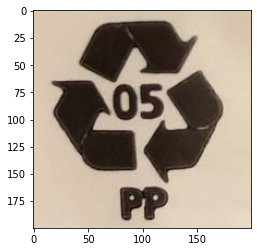

(8, 200, 200, 3)


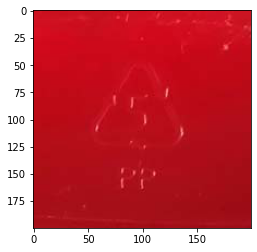

(8, 200, 200, 3)


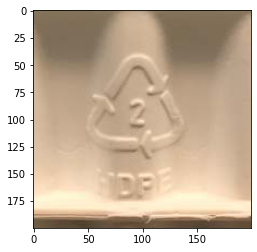

(8, 200, 200, 3)


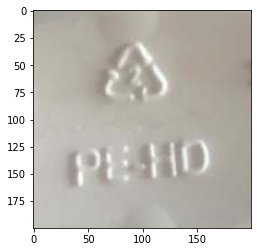

(8, 200, 200, 3)


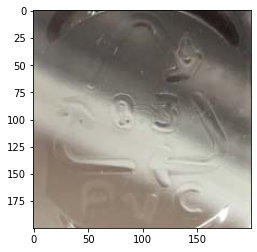

(8, 200, 200, 3)


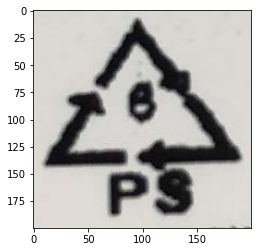

(8, 200, 200, 3)


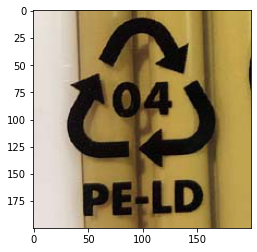

(8, 200, 200, 3)


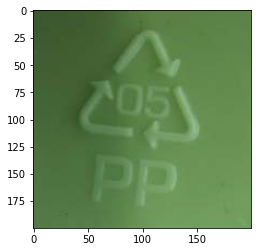

(8, 200, 200, 3)


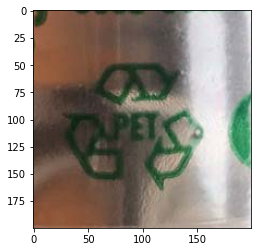

(8, 200, 200, 3)


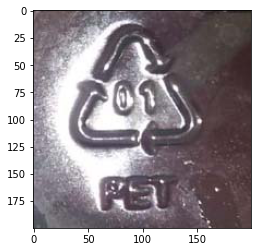

(8, 200, 200, 3)


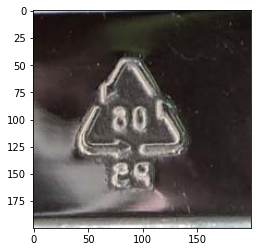

(8, 200, 200, 3)


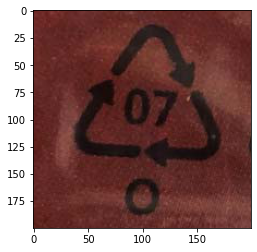

(8, 200, 200, 3)


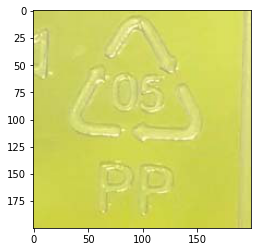

(8, 200, 200, 3)


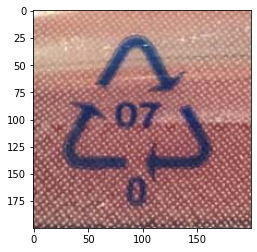

(8, 200, 200, 3)


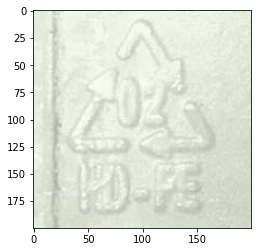

(8, 200, 200, 3)


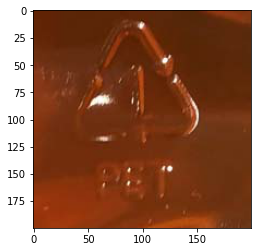

(8, 200, 200, 3)


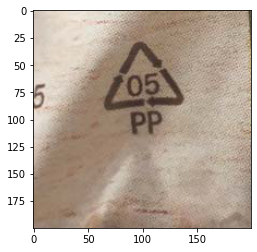

(8, 200, 200, 3)


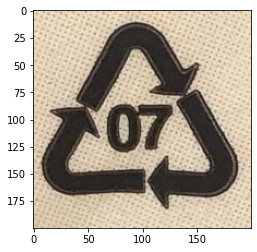

In [23]:
for _ in range(20):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

(8, 200, 200, 3)


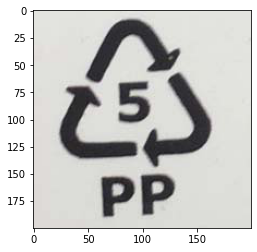

(8, 200, 200, 3)


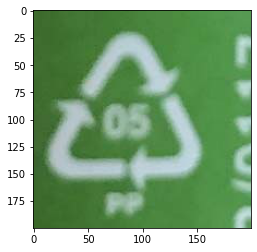

(8, 200, 200, 3)


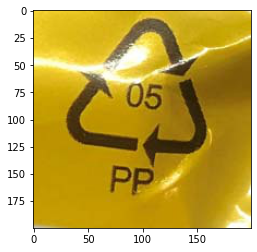

(8, 200, 200, 3)


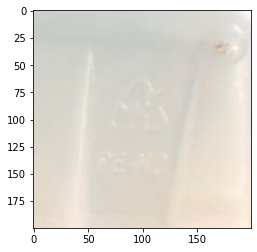

(8, 200, 200, 3)


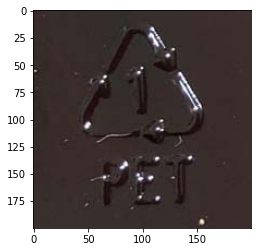

(8, 200, 200, 3)


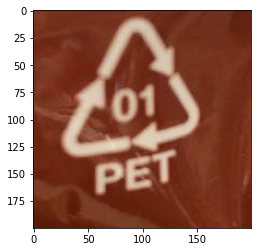

(8, 200, 200, 3)


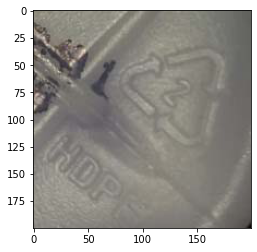

(8, 200, 200, 3)


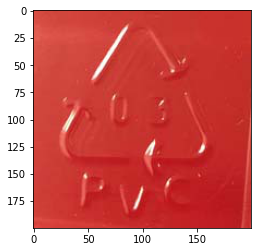

(8, 200, 200, 3)


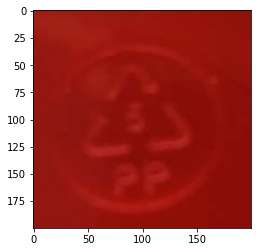

(8, 200, 200, 3)


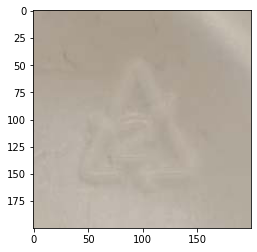

(8, 200, 200, 3)


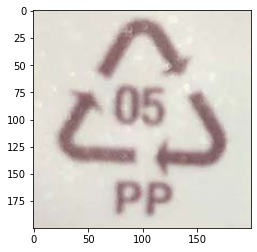

(8, 200, 200, 3)


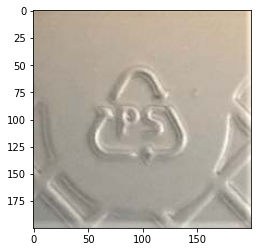

(8, 200, 200, 3)


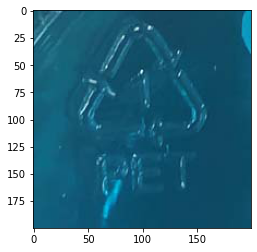

(8, 200, 200, 3)


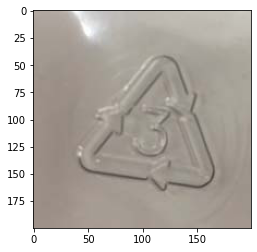

(8, 200, 200, 3)


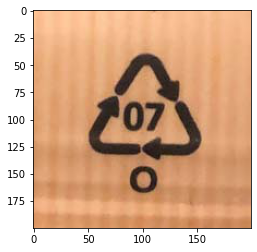

(8, 200, 200, 3)


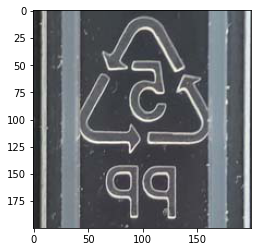

(8, 200, 200, 3)


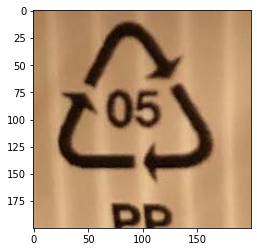

(8, 200, 200, 3)


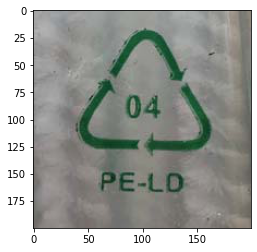

(8, 200, 200, 3)


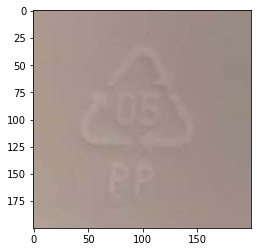

(8, 200, 200, 3)


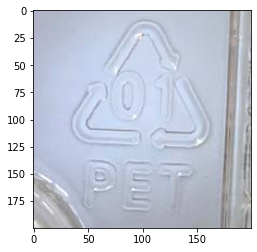

In [24]:
for _ in range(20):
    img, label = validation_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [4]:
model = tf.keras.models.Sequential([
    
    #     tf.keras.layers.Conv2D(64, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)),
#     tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)),
#     tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)),
#     tf.keras.layers.MaxPooling2D(2,2),

    
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=120, steps_per_epoch=STEP_SIZE_TRAIN, validation_data = validation_generator, verbose = 1, validation_steps=STEP_SIZE_VALID)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       1

11/11 [==============================] - 3s 271ms/step - loss: 1.6197 - accuracy: 0.3871 - val_loss: 1.8574 - val_accuracy: 0.3304
Epoch 44/120
11/11 [==============================] - 3s 267ms/step - loss: 1.5613 - accuracy: 0.4332 - val_loss: 1.8356 - val_accuracy: 0.3304
Epoch 45/120
11/11 [==============================] - 3s 267ms/step - loss: 1.7197 - accuracy: 0.3500 - val_loss: 1.8702 - val_accuracy: 0.3036
Epoch 46/120
11/11 [==============================] - 3s 273ms/step - loss: 1.6012 - accuracy: 0.3858 - val_loss: 1.8745 - val_accuracy: 0.3036
Epoch 47/120
11/11 [==============================] - 3s 275ms/step - loss: 1.5978 - accuracy: 0.3872 - val_loss: 1.8953 - val_accuracy: 0.2902
Epoch 48/120
11/11 [==============================] - 3s 265ms/step - loss: 1.5553 - accuracy: 0.3956 - val_loss: 1.7578 - val_accuracy: 0.3304
Epoch 49/120
11/11 [==============================] - 3s 282ms/step - loss: 1.5251 - accuracy: 0.4184 - val_loss: 1.8519 - val_accuracy: 0.3438
Epoch

Epoch 100/120
11/11 [==============================] - 3s 281ms/step - loss: 1.3151 - accuracy: 0.5147 - val_loss: 2.1800 - val_accuracy: 0.3125
Epoch 101/120
11/11 [==============================] - 3s 270ms/step - loss: 1.3224 - accuracy: 0.5437 - val_loss: 2.3610 - val_accuracy: 0.3393
Epoch 102/120
11/11 [==============================] - 3s 268ms/step - loss: 1.3779 - accuracy: 0.5371 - val_loss: 2.2767 - val_accuracy: 0.3170
Epoch 103/120
11/11 [==============================] - 3s 267ms/step - loss: 1.2484 - accuracy: 0.5374 - val_loss: 2.1818 - val_accuracy: 0.2768
Epoch 104/120
11/11 [==============================] - 3s 264ms/step - loss: 1.3234 - accuracy: 0.5358 - val_loss: 2.0698 - val_accuracy: 0.3259
Epoch 105/120
11/11 [==============================] - 3s 262ms/step - loss: 1.4360 - accuracy: 0.4785 - val_loss: 2.0159 - val_accuracy: 0.3348
Epoch 106/120
11/11 [==============================] - 3s 262ms/step - loss: 1.3705 - accuracy: 0.5306 - val_loss: 2.0625 - val_ac

In [19]:
model.save("saved_model/twodensewithl2")

INFO:tensorflow:Assets written to: saved_model/twodensewithl2\assets


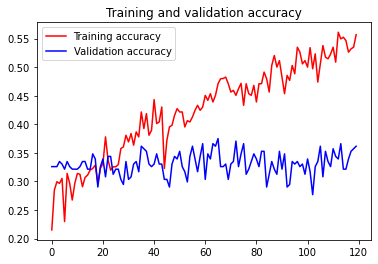

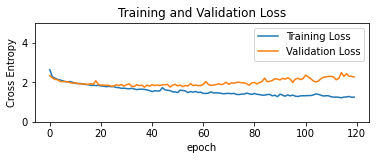

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')



plt.show()

In [3]:
#model_husna = tf.keras.models.load_model('saved_model/model_husna')
#model_l2 = tf.keras.models.load_model('saved_model/twodensewithl2')
model_t = tf.keras.models.load_model('converted_savedmodel/model.savedmodel')

def load_image(infilename):
    
    img = Image.open(infilename)
    
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data
def predict_image(file):
    img = image.load_img(file, target_size=(224,224))
    #img.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model_t.predict(images, batch_size=32)
    print(classes)
#     print(np.where(classes == np.amax(classes)))
    predict = np.argmax(classes, axis = 1)
    print(predict[0]+1)
    
test_list = []
dir='C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori'
#dir='C:/Users/Muhammad Iqbal/TensorFlow/test'
for name in os.listdir(dir):
    test_list.append(dir+'/'+name)

print(len(test_list))
#PATH = os.getcwd()+'\\test\\ldpe20.jpg'

for file in test_list:
    print(file)
    predict_image(file)
    print()

35
C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori/1_polyethylene_PET_0.jpg
[[7.1168959e-02 4.0348911e-01 3.5168430e-08 5.2533984e-01 8.9684573e-07
  1.0572587e-06 3.7928057e-08]]
4

C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori/1_polyethylene_PET_1.jpg
[[1.7744666e-02 5.5551618e-01 1.2359750e-06 4.2615464e-01 2.6578933e-04
  3.1737334e-04 2.1048166e-07]]
2

C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori/1_polyethylene_PET_2.jpg
[[8.0857879e-01 1.8984070e-01 4.2997221e-05 5.0502014e-04 3.7930586e-05
  9.6813298e-04 2.6433694e-05]]
1

C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori/1_polyethylene_PET_3.jpg
[[1.5275294e-01 8.3805358e-01 1.5921716e-04 7.8584719e-03 1.1272120e-03
  1.0642437e-05 3.7958274e-05]]
2

C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori/1_polyethylene_PET_4.jpg
[[1.1993515e-01 3.0918184e-01 2.1337639e-05 5.3335327e-01 6.6038640e-04
  3.6846239e-02 1.7558283e-06]]
4

C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori/2_high_density_polyethylene_PE-HD_1.jpg
[[1

In [12]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

def prediction(model,file):
    # Disable scientific notation for clarity
    np.set_printoptions(suppress=True)

    # Load the model
    #model = tensorflow.keras.models.load_model('converted_keras/keras_model.h5')

    # Create the array of the right shape to feed into the keras model
    # The 'length' or number of images you can put into the array is
    # determined by the first position in the shape tuple, in this case 1.
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

    # Replace this with the path to your image
    image = Image.open(file)

    #resize the image to a 224x224 with the same strategy as in TM2:
    #resizing the image to be at least 224x224 and then cropping from the center
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)

    #turn the image into a numpy array
    image_array = np.asarray(image)

    # display the resized image
    #image.show()

    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

    # Load the image into the array
    data[0] = normalized_image_array

    # run the inference
    prediction = model.predict(data)
    print(prediction)
    predict = np.argmax(prediction, axis = 1)
    print(predict[0]+1)

In [14]:
model = tf.keras.models.load_model('converted_savedmodel/model.savedmodel')
#converted_savedmodel/model.savedmodel
test_list = []
dir='C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori'
#dir='C:/Users/Muhammad Iqbal/TensorFlow/test'
for name in os.listdir(dir):
    test_list.append(dir+'/'+name)

print(len(test_list))
#PATH = os.getcwd()+'\\test\\ldpe20.jpg'

for file in test_list:
    print(file)
    prediction(model,file)
    print()

35
C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori/1_polyethylene_PET_0.jpg
[[0.99999547 0.00000453 0.         0.         0.         0.
  0.        ]]
1

C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori/1_polyethylene_PET_1.jpg
[[1. 0. 0. 0. 0. 0. 0.]]
1

C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori/1_polyethylene_PET_2.jpg
[[0.99982315 0.00000056 0.00017082 0.00000139 0.00000126 0.00000274
  0.        ]]
1

C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori/1_polyethylene_PET_3.jpg
[[0.9998091  0.0000696  0.00008698 0.00000039 0.00000391 0.00003005
  0.        ]]
1

C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori/1_polyethylene_PET_4.jpg
[[0.99989295 0.00000103 0.00000008 0.0000113  0.00008072 0.00000007
  0.00001373]]
1

C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori/2_high_density_polyethylene_PE-HD_1.jpg
[[0.00001013 0.99971503 0.00007421 0.00019777 0.00000001 0.00000263
  0.00000017]]
2

C:/Users/Muhammad Iqbal/TensorFlow/test_from_ori/2_high_density_polyethylene_PE-HD_2.jpg

In [5]:
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model/twodensewithl2')
tflite_model = converter.convert()

with open('model.tflite','wb') as f:
    f.write(tflite_model)